## Project 1: IMDB Video Games Analysis

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# import IMDB video games csv file
data_url = 'https://raw.githubusercontent.com/shriparna/GameOn/main/InputData/imdb-videogames.csv'
df = pd.read_csv(data_url)
df.head()

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False


There are 20803 rows and 17 columns in the original dataset.

#### Data Cleaning

##### Data Exploring
- The cleaned dataset contains 10680 rows and 13 columns
- We kept only the columns that we are using, dropped duplicates in column `name` and `year`, cleaned up the missing values, and converted the data into the correct type
- Further analysis will base on data from 1952 to 2022

In [3]:
# drop the columns
df.drop(['Unnamed: 0', 'url', 'certificate', 'plot'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       20803 non-null  object 
 1   year       20536 non-null  float64
 2   rating     11600 non-null  float64
 3   votes      11600 non-null  object 
 4   Action     20803 non-null  bool   
 5   Adventure  20803 non-null  bool   
 6   Comedy     20803 non-null  bool   
 7   Crime      20803 non-null  bool   
 8   Family     20803 non-null  bool   
 9   Fantasy    20803 non-null  bool   
 10  Mystery    20803 non-null  bool   
 11  Sci-Fi     20803 non-null  bool   
 12  Thriller   20803 non-null  bool   
dtypes: bool(9), float64(2), object(2)
memory usage: 833.1+ KB


In [4]:
# check missing values
df.isna().sum()

name            0
year          267
rating       9203
votes        9203
Action          0
Adventure       0
Comedy          0
Crime           0
Family          0
Fantasy         0
Mystery         0
Sci-Fi          0
Thriller        0
dtype: int64

In [5]:
# exclude all the missing values
df = df[df['year'].notna() & df['rating'].notna() & df['votes'].notna()]
df.isna().sum()

name         0
year         0
rating       0
votes        0
Action       0
Adventure    0
Comedy       0
Crime        0
Family       0
Fantasy      0
Mystery      0
Sci-Fi       0
Thriller     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 20791
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       11599 non-null  object 
 1   year       11599 non-null  float64
 2   rating     11599 non-null  float64
 3   votes      11599 non-null  object 
 4   Action     11599 non-null  bool   
 5   Adventure  11599 non-null  bool   
 6   Comedy     11599 non-null  bool   
 7   Crime      11599 non-null  bool   
 8   Family     11599 non-null  bool   
 9   Fantasy    11599 non-null  bool   
 10  Mystery    11599 non-null  bool   
 11  Sci-Fi     11599 non-null  bool   
 12  Thriller   11599 non-null  bool   
dtypes: bool(9), float64(2), object(2)
memory usage: 555.0+ KB


In [7]:
# convert year column to integer
df['year'] = df['year'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 20791
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       11599 non-null  object 
 1   year       11599 non-null  int32  
 2   rating     11599 non-null  float64
 3   votes      11599 non-null  object 
 4   Action     11599 non-null  bool   
 5   Adventure  11599 non-null  bool   
 6   Comedy     11599 non-null  bool   
 7   Crime      11599 non-null  bool   
 8   Family     11599 non-null  bool   
 9   Fantasy    11599 non-null  bool   
 10  Mystery    11599 non-null  bool   
 11  Sci-Fi     11599 non-null  bool   
 12  Thriller   11599 non-null  bool   
dtypes: bool(9), float64(1), int32(1), object(2)
memory usage: 509.7+ KB


In [8]:
# convert votes column from string to numeric
df['votes'] = df['votes'].str.replace(',', '')
df['votes'] = df['votes'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 20791
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       11599 non-null  object 
 1   year       11599 non-null  int32  
 2   rating     11599 non-null  float64
 3   votes      11599 non-null  int32  
 4   Action     11599 non-null  bool   
 5   Adventure  11599 non-null  bool   
 6   Comedy     11599 non-null  bool   
 7   Crime      11599 non-null  bool   
 8   Family     11599 non-null  bool   
 9   Fantasy    11599 non-null  bool   
 10  Mystery    11599 non-null  bool   
 11  Sci-Fi     11599 non-null  bool   
 12  Thriller   11599 non-null  bool   
dtypes: bool(9), float64(1), int32(2), object(1)
memory usage: 464.4+ KB


In [9]:
df.describe()

,year,rating,votes
count,11599.000000,11599.000000,11599.000000
mean,2004.906716,7.047461,630.645056
std,10.689770,1.235237,2703.282351
min,1952.000000,1.000000,5.000000
25%,1997.000000,6.400000,17.000000
50%,2006.000000,7.200000,48.000000
75%,2014.000000,7.900000,205.000000
max,2022.000000,9.700000,60597.000000


In [10]:
df.shape

(11599, 13)

In [11]:
# some video game name and year are duplicates
# drop those duplicates
df.drop_duplicates(subset='name', inplace=True, ignore_index=True)
df.shape

(10680, 13)

In [12]:
len(df['name'].unique())

10680

### The Distribution of Genre

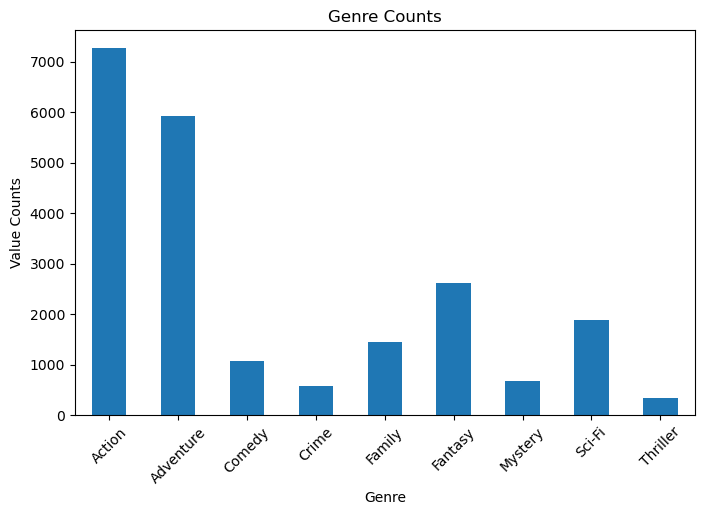

In [13]:
df_genre = df[['Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']]

df_genre.sum(axis=0).plot(kind='bar', figsize=(8, 5), title='Genre Counts', xlabel='Genre', ylabel='Value Counts', rot=45)
plt.savefig('../Visuals/genre_counts.png')
plt.show()

### Genre v.s. Year

See how the number of video games grow in each genre by year.

- Overall, video games did not getting popular after 1980s, no matter the genre type
- `Action` and `Adventure` are the most common two genres all the time

In [14]:
grouped_genre = df.groupby('year').agg({'Action': 'sum', 
                                        'Adventure': 'sum', 
                                        'Comedy': 'sum', 
                                        'Crime': 'sum', 
                                        'Family': 'sum', 
                                        'Fantasy': 'sum', 
                                        'Mystery': 'sum',
                                        'Sci-Fi': 'sum', 
                                        'Thriller': 'sum'})
grouped_genre

,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
year,,,,,,,,,
1952,1,0,0,0,0,0,0,0,0
1962,1,0,0,0,0,0,0,1,0
1969,0,0,0,0,0,0,0,1,0
1970,1,0,0,0,0,0,0,0,0
1971,2,1,0,0,1,0,0,2,0
1972,2,1,0,0,6,1,1,2,0
1973,3,0,0,0,1,0,0,4,0
1974,5,0,0,0,0,0,0,1,0
1975,2,0,0,0,1,3,0,0,1


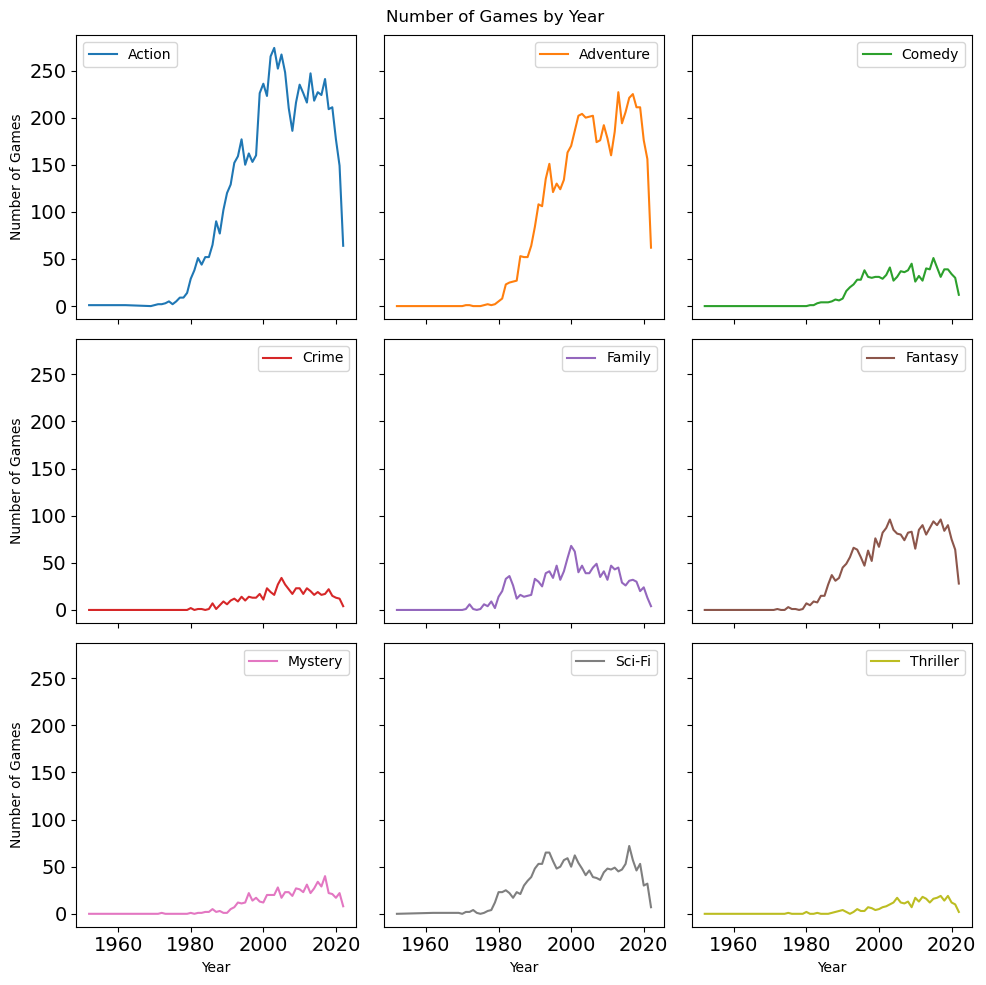

In [15]:
grouped_genre.plot(figsize=(10, 10), subplots=True, layout=(3, 3), sharex=True, sharey=True,
                   title='Number of Games by Year', xlabel='Year', ylabel='Number of Games', fontsize=14)
plt.tight_layout()
plt.savefig('../Visuals/number_of_games_by_year.png')
plt.show()

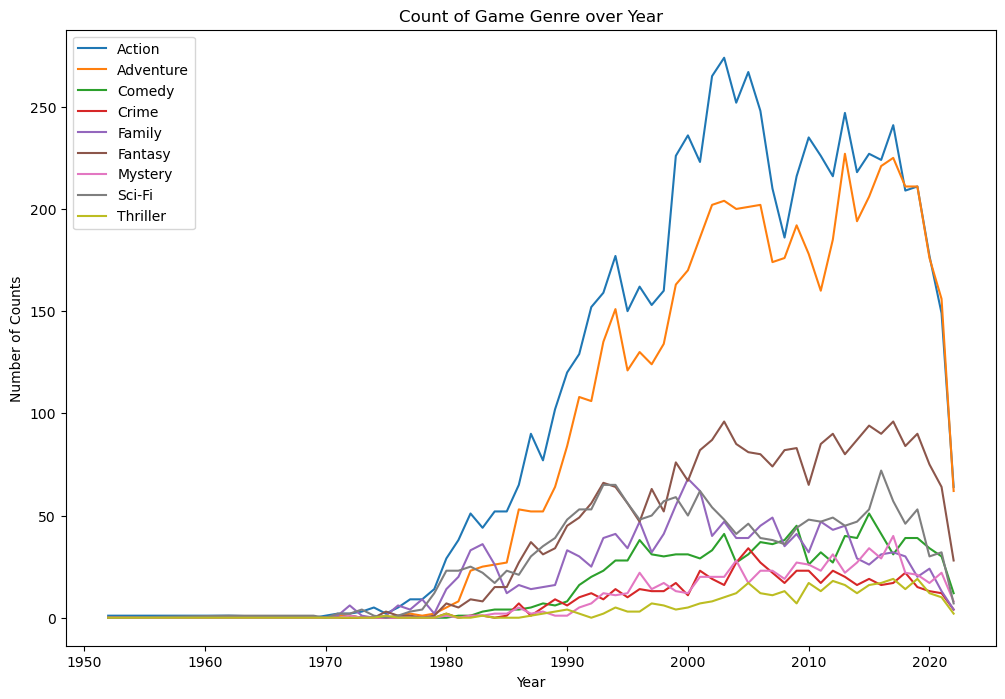

In [16]:
plt.figure(figsize=(12, 8))
plt.plot(grouped_genre.index, grouped_genre['Action'], label='Action')
plt.plot(grouped_genre.index, grouped_genre['Adventure'], label='Adventure')
plt.plot(grouped_genre.index, grouped_genre['Comedy'], label='Comedy')
plt.plot(grouped_genre.index, grouped_genre['Crime'], label='Crime')
plt.plot(grouped_genre.index, grouped_genre['Family'], label='Family')
plt.plot(grouped_genre.index, grouped_genre['Fantasy'], label='Fantasy')
plt.plot(grouped_genre.index, grouped_genre['Mystery'], label='Mystery')
plt.plot(grouped_genre.index, grouped_genre['Sci-Fi'], label='Sci-Fi')
plt.plot(grouped_genre.index, grouped_genre['Thriller'], label='Thriller')
plt.title('Count of Game Genre over Year')
plt.xlabel('Year')
plt.ylabel('Number of Counts')
plt.legend()
plt.savefig('../Visuals/count_of_genre_over_year.png')
plt.show()


In [17]:
grouped_genre.loc['Total'] = grouped_genre.sum(numeric_only=True)
grouped_genre.tail(1)

,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
year,,,,,,,,,
Total,7263,5918,1077,581,1450,2614,664,1887,333


### Top 20 Rating Games

We can tell based on the result, the Top 20 rating games all in `Action` genre, mostly in `Adventure` genre, and some in `Fantasy` genre. For other genres that we have in the dataset, they are either a few or none in the Top 20.

In [18]:
# Get the top 20 rating games
df.sort_values(by='rating', ascending=False).head(20)

,name,year,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
276,The Witcher 3: Wild Hunt - Blood and Wine,2016,9.7,7555,True,True,False,False,False,False,False,False,False
1,Red Dead Redemption II,2018,9.7,35703,True,True,False,True,False,False,False,False,False
27,The Witcher 3: Wild Hunt,2015,9.7,26083,True,True,False,False,False,False,False,False,False
7,The Last of Us,2013,9.7,60590,True,True,False,False,False,False,False,False,False
76,Mass Effect: Legendary Edition,2021,9.7,1583,True,True,False,False,False,False,False,True,False
3,God of War,2018,9.6,26118,True,True,False,False,False,False,False,False,False
234,The Legend of Zelda: Ocarina of Time,1998,9.6,9526,True,True,False,False,False,True,False,False,False
138,Metal Gear Solid,1998,9.6,11780,True,True,False,False,False,False,False,False,False
194,Persona 5 Royal,2019,9.6,1189,True,True,False,False,False,True,False,False,False
60,Mass Effect 2,2010,9.5,19912,True,True,False,False,False,False,False,False,False


#### Year & Genre (Rating over 9.0)

By looking at the plot, `Action`, `Adventure`, and `Fantasy` are also the Top 3 of the video game genre.

In [19]:
rating_over_9 = df.loc[df['rating'] >= 9.0]
over_9_greouped = rating_over_9.groupby('year').agg({
                                                     'Action': 'sum',
                                                     'Adventure': 'sum',
                                                     'Comedy': 'sum', 
                                                     'Crime': 'sum',
                                                     'Family': 'sum',
                                                     'Fantasy': 'sum',
                                                     'Mystery': 'sum',
                                                     'Sci-Fi': 'sum',
                                                     'Thriller': 'sum'})

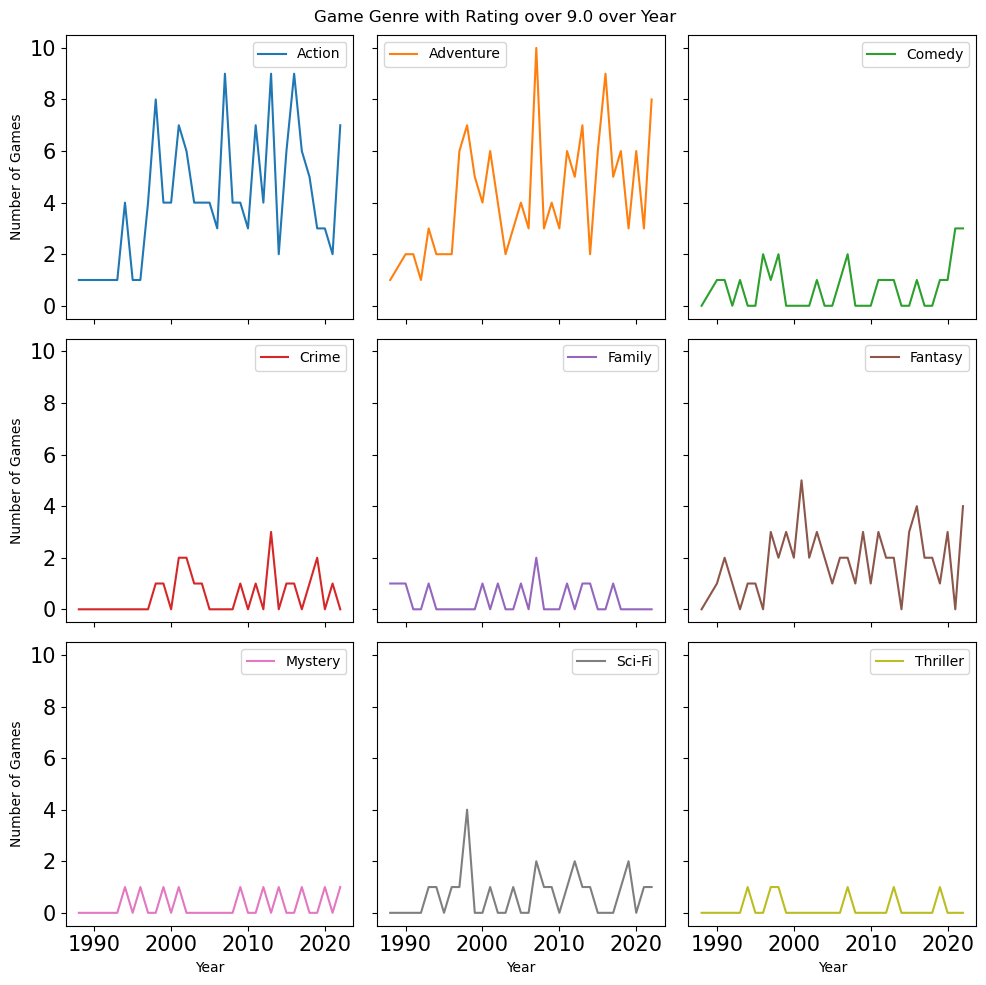

In [20]:
over_9_greouped.plot(figsize=(10, 10), subplots=True, layout=(3, 3), sharex=True, sharey=True,
                     title='Game Genre with Rating over 9.0 over Year', xlabel='Year', ylabel='Number of Games', fontsize=15)
plt.tight_layout()
plt.savefig('../Visuals/genre_with_rating_over_9.png')
plt.show()

### Genre v.s. Rating

See the average rating of each genre by year.

In [21]:
ratings = []
genres = ['Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']

for genre in genres:
    rating = df[df[genre] == True][['year', 'rating']].groupby('year').mean().rename(columns={'rating': genre})
    ratings.append(rating)

df_genre_rating = pd.concat(ratings, axis=1)

# drop the nulls
df_genre_rating = df_genre_rating[df_genre_rating.index > 1993]
df_genre_rating

,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
year,,,,,,,,,
1994,6.893220,7.205298,6.732143,7.078571,6.492683,7.007812,7.227273,6.909231,6.760000
1995,6.871333,7.136364,6.750000,6.560000,6.761765,7.278571,7.266667,6.925000,7.100000
1996,7.222222,7.314615,7.323684,7.064286,6.759574,7.485106,7.622727,7.189583,7.200000
1997,7.267974,7.481452,7.416129,7.238462,6.896875,7.233333,7.821429,7.350000,7.628571
1998,7.434375,7.580597,7.446667,7.700000,7.221951,7.565385,7.300000,7.517544,7.816667
1999,7.415929,7.529448,7.603226,7.741176,6.854545,7.673684,7.323077,7.476271,7.800000
2000,7.130085,7.357647,7.103226,7.427273,6.600000,7.285075,7.150000,7.034000,7.000000
2001,7.141256,7.227419,7.065517,7.530435,6.875806,7.497561,7.595000,6.890323,7.042857
2002,7.188679,7.267327,6.851515,7.400000,6.840000,7.380460,7.500000,7.077778,6.925000


Only include data after 1993 to avoid missing values.

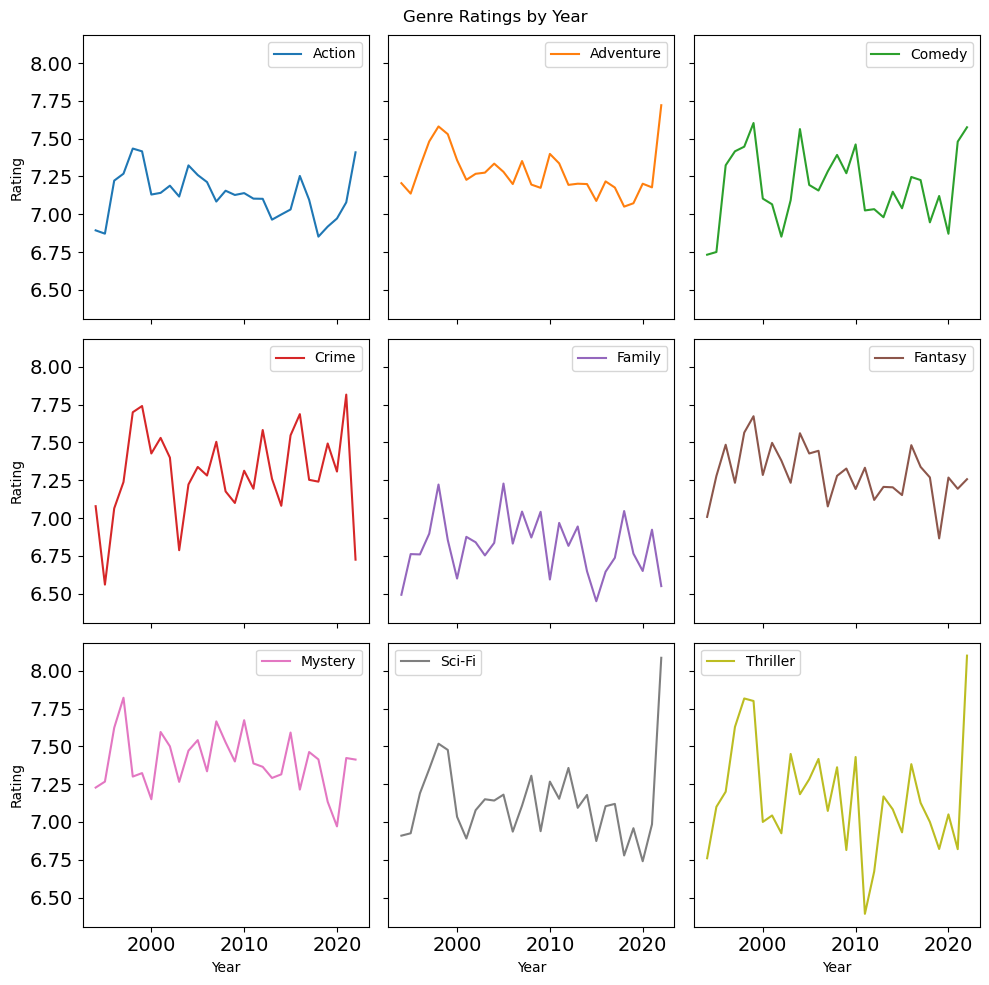

In [22]:
df_genre_rating.plot(figsize=(10, 10), subplots=True, layout=(3, 3), sharex=True, sharey=True,
                     title='Genre Ratings by Year', xlabel='Year', ylabel='Rating', fontsize=14)
plt.tight_layout()
plt.savefig('../Visuals/genre_rating_by_year.png')
plt.show()

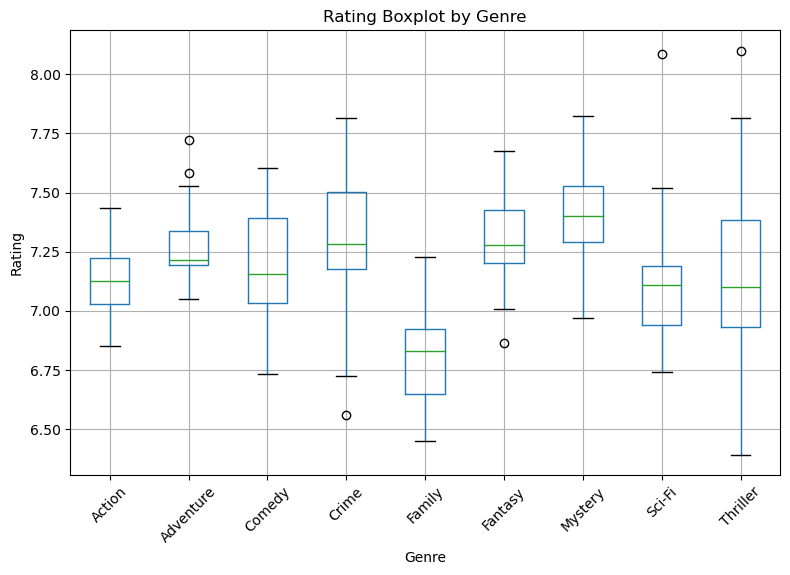

In [23]:
df_genre_rating.boxplot(rot=45, figsize=(8, 6))
plt.title('Rating Boxplot by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.suptitle("")
plt.tight_layout()
plt.savefig('../Visuals/rating_boxplot_by_genre.png')
plt.show()

In [24]:
df_genre_rating.loc['Mean'] = df_genre_rating.mean(numeric_only=True)
df_genre_rating.tail(1)

,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
year,,,,,,,,,
Mean,7.129617,7.274014,7.186097,7.298382,6.815365,7.297897,7.40209,7.131812,7.166586


### Genre v.s. Votes

See how the votes in each genre changed by year.

(Suppose that the more votes, more gamers)

In [25]:
votes = []
genres = ['Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']

for genre in genres:
    vote = df[df[genre] == True][['year', 'votes']].groupby('year').sum().rename(columns={'votes': genre})
    votes.append(vote)

df_genre_vote = pd.concat(votes, axis=1)

# drop the nulls
df_genre_vote = df_genre_vote[df_genre_vote.index > 1993]
df_genre_vote

,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
year,,,,,,,,,
1994,35250.0,27446.0,6119.0,2660.0,7136.0,12227.0,3040.0,11244.0,550.0
1995,30679.0,21678.0,3263.0,1881.0,4219.0,17014.0,1154.0,8023.0,397.0
1996,52685.0,39506.0,15817.0,1242.0,11927.0,13131.0,8911.0,6897.0,496.0
1997,60727.0,49555.0,10409.0,6396.0,2343.0,31209.0,4307.0,19090.0,8070.0
1998,84802.0,78062.0,9107.0,7070.0,5174.0,23373.0,1431.0,39675.0,10827.0
1999,77673.0,49205.0,5555.0,9784.0,12125.0,31617.0,6821.0,18232.0,3506.0
2000,63256.0,52407.0,7599.0,7690.0,8828.0,27017.0,3827.0,8753.0,2325.0
2001,104329.0,69805.0,10381.0,35325.0,11456.0,35564.0,21179.0,13073.0,2386.0
2002,121215.0,76016.0,4079.0,41922.0,12294.0,36452.0,8775.0,8818.0,3985.0


Only include data after 1993 to avoid missing values.

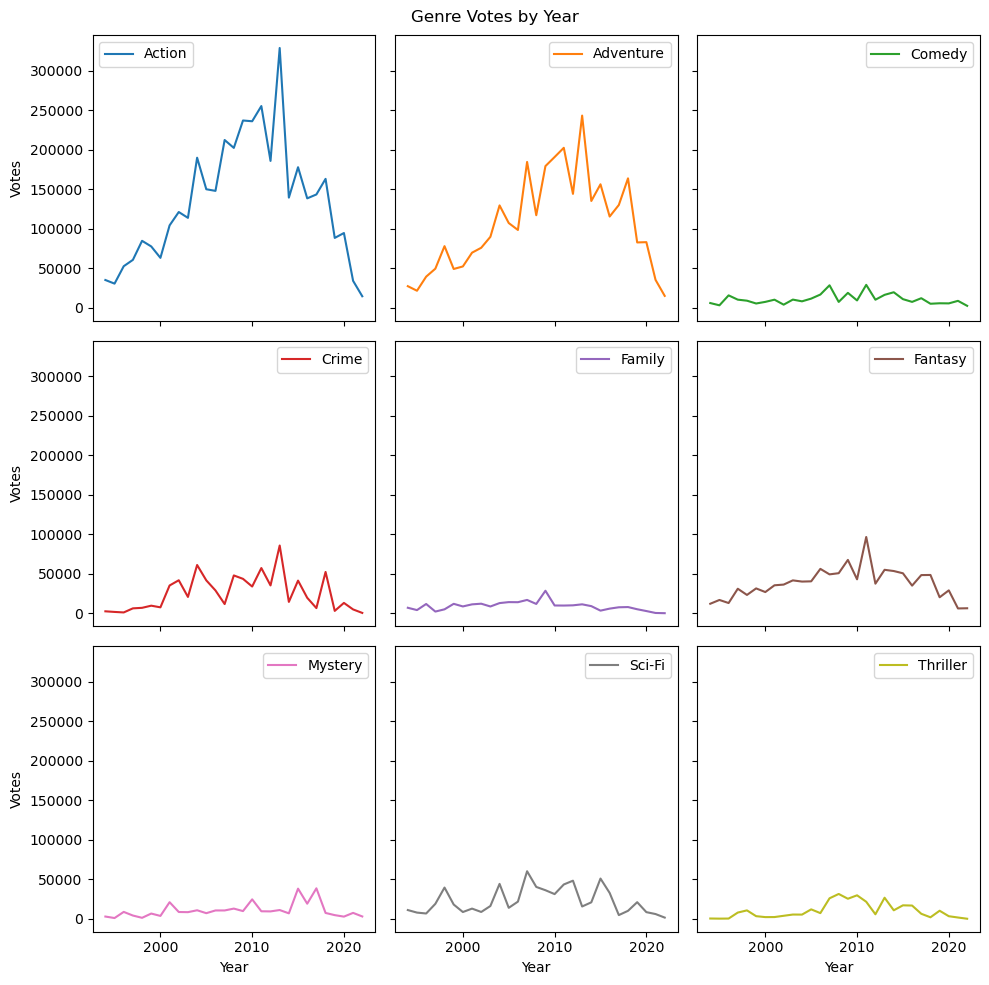

In [26]:
df_genre_vote.plot(figsize=(10, 10), subplots=True, layout=(3, 3), sharex=True, sharey=True,
                   title='Genre Votes by Year', xlabel='Year', ylabel='Votes')
plt.tight_layout()
plt.savefig('../Visuals/genre_votes_by_year.png')
plt.show()

In [27]:
df_genre_vote.loc['Mean'] = df_genre_vote.mean(numeric_only=True)
df_genre_vote.tail(1)

,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
year,,,,,,,,,
Mean,133925.275862,105785.275862,11005.517241,25522.862069,9272.965517,38133.275862,10884.172414,22913.827586,10353.482759


<Axes: >

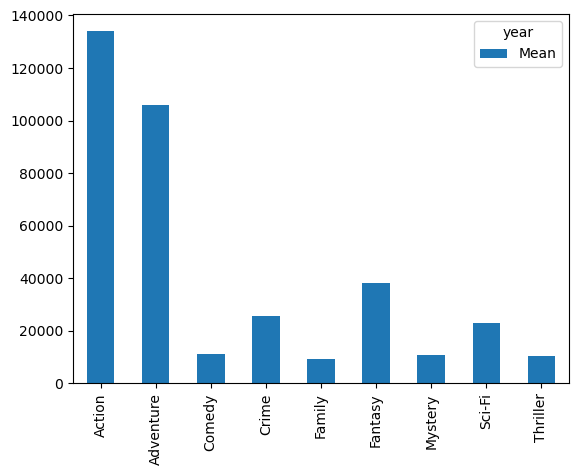

In [28]:
df_genre_vote.tail(1).T.plot(kind='bar')

In [29]:
df_action = df[['name', 'year', 'rating', 'votes', 'Action']].loc[df['Action'] == True]
df_adv = df[['name', 'year', 'rating', 'votes', 'Adventure']].loc[df['Adventure'] == True]

In [30]:
df_action.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7263 entries, 0 to 10677
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    7263 non-null   object 
 1   year    7263 non-null   int32  
 2   rating  7263 non-null   float64
 3   votes   7263 non-null   int32  
 4   Action  7263 non-null   bool   
dtypes: bool(1), float64(1), int32(2), object(1)
memory usage: 234.1+ KB


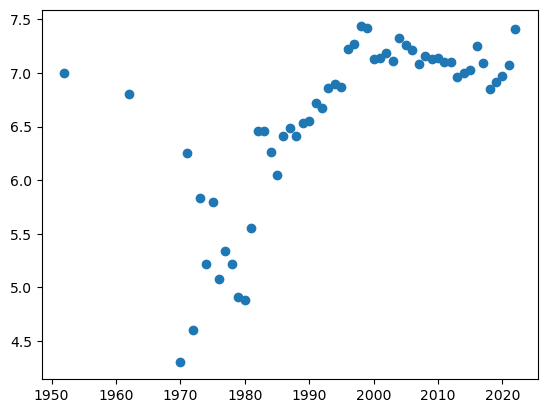

In [31]:
grouped_year = df_action.groupby('year', as_index=False)['rating'].mean()
plt.scatter(grouped_year['year'], grouped_year['rating'])

### Action with other Genre Rating

Since `Action` is the most popular genre in the dataset, we would like to look into further to see the combination of two genres (`Action` and another), and the `rating` of each of the group.
<br>
<i>We are awared that most of the game in `Action` genre are recoginized as `Adventure` genre as well.</i>
<br><br>
|                 | Action | Action & Adventure | Action & Comedy | Action & Crime | Action & Family | Action & Fantasy | Action & Mystery | Action & Sci-Fi | Action & Thriller |
| :-------------- | :----: | :----------------: | :-------------: | :------------: | :-------------: | :--------------: | :--------------: | :-------------: | :---------------: |
| Number of Games |**1437**| <mark>3974</mark>  |       605       |       434      |       659       |        1786      |        186       |       1391      |         198       |
| AVG Rating |**6.66**|<span style="background-color:green">7.219</span>|<span style="background-color:green">7.1</span>|<span style="background-color:green">7.179</span>|<span style="background-color:green">6.911</span>|<span style="background-color:green">7.231</span>|<mark>7.38</mark>|<span style="background-color:green">6.849</span>|<span style="background-color:green">7.06</span>|

There are a total of 1437 Action genre games.
The average rating of Action genre is 6.66. 

There are a total of 3974 Action & Adventure genre games.
The average rating for the combination of Action and Adventure genre is 7.219. 

There are a total of 605 Action & Comedy genre games.
The average rating for the combination of Action and Comedy genre is 7.1. 

There are a total of 434 Action & Crime genre games.
The average rating for the combination of Action and Crime genre is 7.179. 

There are a total of 659 Action & Family genre games.
The average rating for the combination of Action and Family genre is 6.911. 

There are a total of 1786 Action & Fantasy genre games.
The average rating for the combination of Action and Fantasy genre is 7.231. 

There are a total of 186 Action & Mystery genre games.
The average rating for the combination of Action and Mystery genre is 7.38. 

There are a total of 1391 Action & Sci-Fi genre games.
The average rating for the combination of Action and S

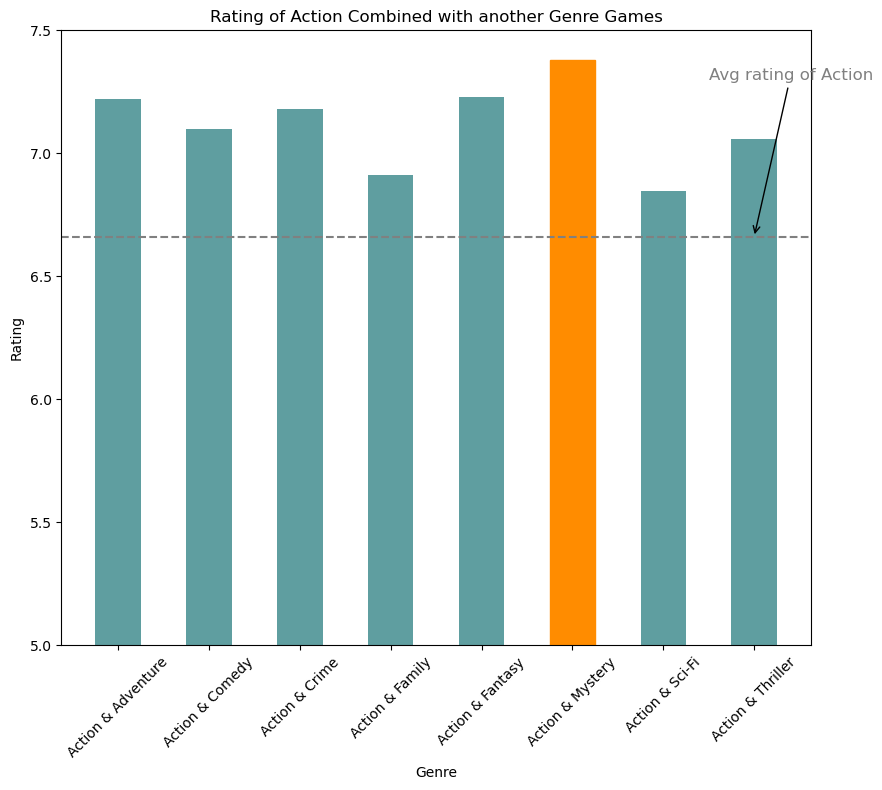

In [32]:
other_than_action = ['Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']
action_only = df[(df['Action'] == True) & (df['Adventure'] == False) & (df['Comedy'] == False) & (df['Crime'] == False) & (df['Family'] == False) & (df['Fantasy'] == False) & (df['Mystery'] == False) & (df['Sci-Fi'] == False) & (df['Thriller'] == False)]
action_avg_rating = round(action_only['rating'].mean(), 3)
print(f"There are a total of {len(action_only)} Action genre games.")
print(f"The average rating of Action genre is {action_avg_rating}. \n")
y_axis = []
x_axis = []

for genre in other_than_action:
    games = df.loc[(df['Action'] == True) & (df[genre] == True)]
    avg_rating = round(df.loc[(df['Action'] == True) & (df[genre] == True)]['rating'].mean(), 3)
    y_axis.append(avg_rating)
    x_axis.append(f'Action & {genre}')
    print(f"There are a total of {len(games)} Action & {genre} genre games.")
    print(f"The average rating for the combination of Action and {genre} genre is {avg_rating}. \n")

plt.figure(figsize=(9, 8))
figure = plt.bar(x_axis, y_axis, align='center', width=0.5, color='cadetblue')
figure[5].set_color('darkorange')
plt.axhline(y=action_avg_rating, color='grey', linestyle='--', linewidth=1.5)
plt.annotate('Avg rating of Action', xy=(7, action_avg_rating), xytext=(6.5, 7.3), color='grey', fontsize=12, arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))
plt.xticks(x_axis, rotation=45)
plt.title('Rating of Action Combined with another Genre Games')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.ylim(5, 7.5)
plt.tight_layout()
plt.savefig('../Visuals/rating_of_Action_and_another_genre.png')
plt.show()

In [33]:
# Highest rating games in Action & Mystery genre
df.loc[(df['Action'] == True) & (df['Mystery'] == True)].sort_values(by='rating', ascending=False)[:10]

,name,year,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
6,Horizon Forbidden West,2022,9.2,2979,True,True,False,False,False,False,True,False,False
1035,Super Metroid,1994,9.1,2086,True,True,False,False,False,False,True,False,False
30,Horizon Zero Dawn,2017,9.0,14234,True,True,False,False,False,False,True,False,False
1137,Metroid Prime,2002,8.9,1989,True,True,False,False,False,False,True,False,False
129,Resident Evil,1996,8.9,5446,True,False,False,False,False,False,True,False,False
5850,Metroid Prime: Trilogy,2009,8.9,35,True,True,False,False,False,False,True,False,False
1081,Freelancer,2003,8.8,524,True,True,False,False,False,False,True,False,False
1995,Titanic: Adventure Out of Time,1996,8.8,308,True,True,False,False,False,False,True,False,False
431,Hitman: Blood Money,2006,8.8,5488,True,False,False,True,False,False,True,False,False
212,Halo: Combat Evolved,2001,8.8,11196,True,True,False,False,False,False,True,False,False


|                 | Action & Adventure | Action & Adventure & Comedy | Action & Adventure & Crime | Action & Adventure & Family | Action & Adventure & Fantasy | Action & Adventure & Mystery | Action & Adventure & Sci-Fi | Action & Adventure & Thriller |
| :-------------- | :----------------: | :-------------: | :------------: | :-------------: | :--------------: | :--------------: | :-------------: | :---------------: |
| Number of Games |**3974**| 426 | 160 | 426 | 1300 | 75 | 513 | 38 |
| AVG Rating |**7.219**|<span style="background-color:red">7.188</span>|<span style="background-color:green">7.232</span>|<span style="background-color:red">7.042</span>|<span style="background-color:green">7.334</span>|<mark>7.595</mark>|<span style="background-color:red">7.132</span>|<span style="background-color:red">6.995</span>|

There are a total of 1036 Action & Adventure genre games.
The average rating of Action and Adventure genre is 7.219. 

There are a total of 426 Action/Adventure & Comedy genre games.
The average rating for the combination of Action, Adventure and Comedy genre is 7.188. 

There are a total of 160 Action/Adventure & Crime genre games.
The average rating for the combination of Action, Adventure and Crime genre is 7.232. 

There are a total of 426 Action/Adventure & Family genre games.
The average rating for the combination of Action, Adventure and Family genre is 7.042. 

There are a total of 1300 Action/Adventure & Fantasy genre games.
The average rating for the combination of Action, Adventure and Fantasy genre is 7.334. 

There are a total of 75 Action/Adventure & Mystery genre games.
The average rating for the combination of Action, Adventure and Mystery genre is 7.595. 

There are a total of 513 Action/Adventure & Sci-Fi genre games.
The average rating for the combination of Action, 

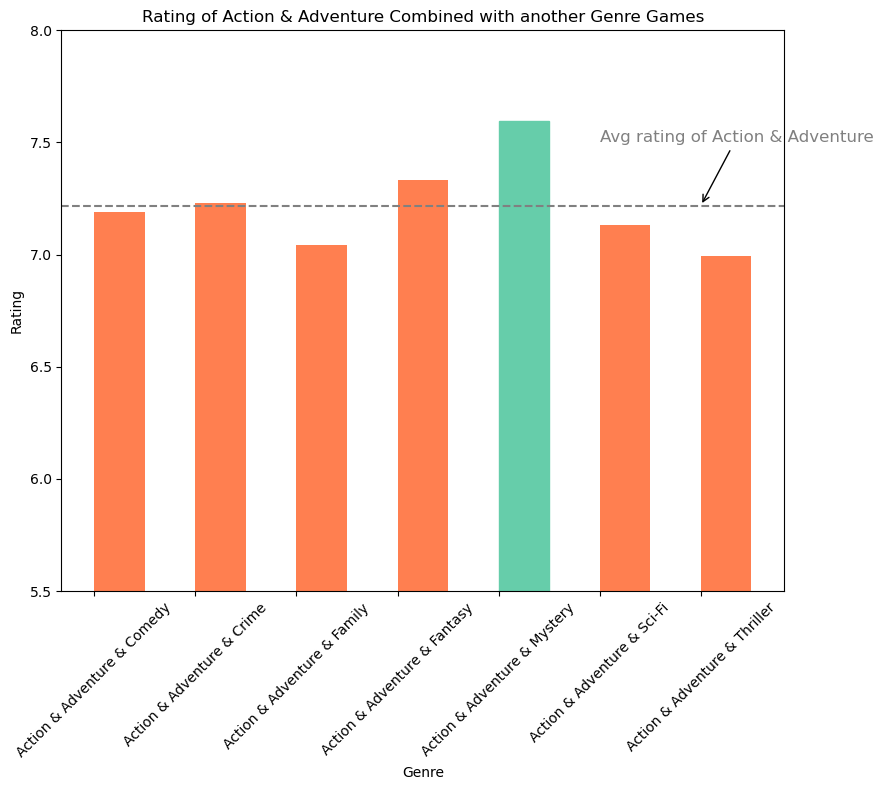

In [34]:
other_than_ac_ad = ['Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']
action_adventure = df[(df['Action'] == True) & (df['Adventure'] == True) & (df['Comedy'] == False) & (df['Crime'] == False) & (df['Family'] == False) & (df['Fantasy'] == False) & (df['Mystery'] == False) & (df['Sci-Fi'] == False) & (df['Thriller'] == False)]
ac_ad_avg_rating = round(df.loc[(df['Action'] == True) & (df['Adventure'] == True)]['rating'].mean(), 3)
print(f"There are a total of {len(action_adventure)} Action & Adventure genre games.")
print(f"The average rating of Action and Adventure genre is {ac_ad_avg_rating}. \n")
y_axis_1 = []
x_axis_1 = [f"Action & Adventure & {genre}" for genre in other_than_ac_ad]

for genre in other_than_ac_ad:
    games = df.loc[(df['Action'] == True) & (df['Adventure'] == True) & (df[genre] == True)]
    avg_rating = round(df.loc[(df['Action'] == True) & (df['Adventure'] == True) & (df[genre] == True)]['rating'].mean(), 3)
    y_axis_1.append(avg_rating)
    print(f"There are a total of {len(games)} Action/Adventure & {genre} genre games.")
    print(f"The average rating for the combination of Action, Adventure and {genre} genre is {avg_rating}. \n")

plt.figure(figsize=(9, 8))
figure_1 = plt.bar(x_axis_1, y_axis_1, align='edge', width=0.5, color='coral')
figure_1[4].set_color('mediumaquamarine')
plt.axhline(y=ac_ad_avg_rating, color='grey', linestyle='--', linewidth=1.5)
plt.annotate('Avg rating of Action & Adventure', xy=(6, ac_ad_avg_rating), xytext=(5, 7.5), color='grey', fontsize=12, arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))
plt.xticks(x_axis_1, rotation=45)
plt.title('Rating of Action & Adventure Combined with another Genre Games')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.ylim(5.5, 8)
plt.tight_layout()
plt.savefig('../Visuals/rating_of_Action&Adventure_with_another_genre.png')
plt.show()

In [35]:
# Highest rating games in Action & Adventure & Mystery genre
df.loc[(df['Action'] == True) & (df['Adventure'] == True) & (df['Mystery'] == True)].sort_values(by='rating', ascending=False)[:10]

,name,year,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
6,Horizon Forbidden West,2022,9.2,2979,True,True,False,False,False,False,True,False,False
1035,Super Metroid,1994,9.1,2086,True,True,False,False,False,False,True,False,False
30,Horizon Zero Dawn,2017,9.0,14234,True,True,False,False,False,False,True,False,False
5850,Metroid Prime: Trilogy,2009,8.9,35,True,True,False,False,False,False,True,False,False
1137,Metroid Prime,2002,8.9,1989,True,True,False,False,False,False,True,False,False
977,Metroid Dread,2021,8.8,465,True,True,False,False,False,False,True,False,False
212,Halo: Combat Evolved,2001,8.8,11196,True,True,False,False,False,False,True,False,False
1995,Titanic: Adventure Out of Time,1996,8.8,308,True,True,False,False,False,False,True,False,False
1081,Freelancer,2003,8.8,524,True,True,False,False,False,False,True,False,False
525,Horizon Zero Dawn: The Frozen Wilds,2017,8.7,1785,True,True,False,False,False,False,True,False,False


|                 | Action & Mystery | Action & Mystery & Adventure | Action & Mystery & Comedy | Action & Mystery & Crime | Action & Mystery & Family | Action & Mystery & Fantasy | Action & Mystery & Sci-Fi | Action & Mystery & Thriller |
| :-------------- | :----------------: | :-------------: | :------------: | :-------------: | :--------------: | :--------------: | :-------------: | :---------------: |
| Number of Games |**186**| 75 | 1 | 17 | 1 | 15 | 22 | 2 |
| AVG Rating |**7.38**|<mark>7.595</mark>|<span style="background-color:red">7.3</span>|<span style="background-color:red">7.341</span>|<span style="background-color:red">7.2</span>|<span style="background-color:red">7.193</span>|<span style="background-color:red">7.014</span>|<span style="background-color:green">7.4</span>|

There are a total of 186 Action & Mystery genre games.
The average rating of Action and Mystery genre is 7.38. 

There are a total of 75 Action/Mystery & Adventure genre games.
The average rating for the combination of Action, Mystery and Adventure genre is 7.595. 

There are a total of 1 Action/Mystery & Comedy genre games.
The average rating for the combination of Action, Mystery and Comedy genre is 7.3. 

There are a total of 17 Action/Mystery & Crime genre games.
The average rating for the combination of Action, Mystery and Crime genre is 7.341. 

There are a total of 1 Action/Mystery & Family genre games.
The average rating for the combination of Action, Mystery and Family genre is 7.2. 

There are a total of 15 Action/Mystery & Fantasy genre games.
The average rating for the combination of Action, Mystery and Fantasy genre is 7.193. 

There are a total of 22 Action/Mystery & Sci-Fi genre games.
The average rating for the combination of Action, Mystery and Sci-Fi genre is 7.014. 


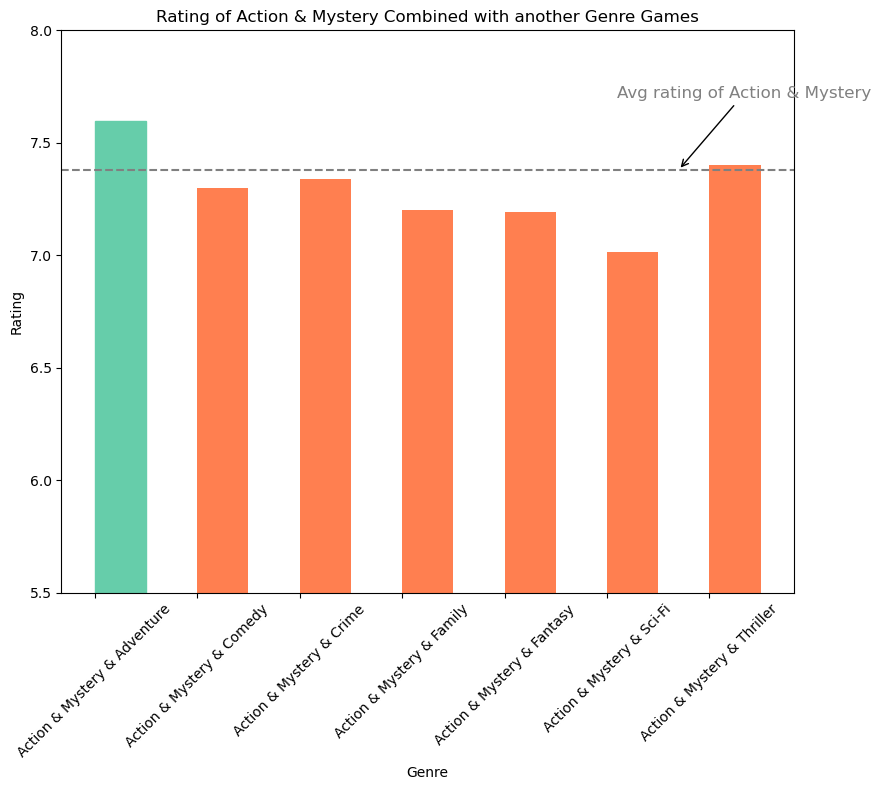

In [36]:
other_than_ac_my = ['Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy', 'Sci-Fi', 'Thriller']
action_mystery = df.loc[(df['Action'] == True) & (df['Mystery'] == True)]
ac_my_avg_rating = round(df.loc[(df['Action'] == True) & (df['Mystery'] == True)]['rating'].mean(), 3)
print(f"There are a total of {len(action_mystery)} Action & Mystery genre games.")
print(f"The average rating of Action and Mystery genre is {ac_my_avg_rating}. \n")
y_axis_2 = []
x_axis_2 = [f"Action & Mystery & {genre}" for genre in other_than_ac_my]

for genre in other_than_ac_my:
    games = df.loc[(df['Action'] == True) & (df['Mystery'] == True) & (df[genre] == True)]
    avg_rating = round(df.loc[(df['Action'] == True) & (df['Mystery'] == True) & (df[genre] == True)]['rating'].mean(), 3)
    y_axis_2.append(avg_rating)
    print(f"There are a total of {len(games)} Action/Mystery & {genre} genre games.")
    print(f"The average rating for the combination of Action, Mystery and {genre} genre is {avg_rating}. \n")

plt.figure(figsize=(9, 8))
figure_2 = plt.bar(x_axis_2, y_axis_2, align='edge', width=0.5, color='coral')
figure_2[0].set_color('mediumaquamarine')
plt.axhline(y=ac_my_avg_rating, color='grey', linestyle='--', linewidth=1.5)
plt.annotate('Avg rating of Action & Mystery', xy=(5.7, ac_my_avg_rating), xytext=(5.1, 7.7), color='grey', fontsize=12, arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))
plt.xticks(x_axis_2, rotation=45)
plt.title('Rating of Action & Mystery Combined with another Genre Games')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.ylim(5.5, 8)
plt.tight_layout()
plt.savefig('../Visuals/rating_of_Action&Mystery_with_another_genre.png')
plt.show()

In [37]:
# regression between rating and votes
slope, intercept, rvalue, pvalue, stderr = stats.linregress(df['votes'], df['rating'])
print(slope, intercept, rvalue, pvalue, stderr)

# votes < 21813
votes_range_df = df.loc[df['votes'] < 21813]
fit = intercept + slope * votes_range_df['rating']


0.00014008486273732793 6.944379669454151 0.2205436578070433 8.471484778899775e-118 5.995483804264697e-06


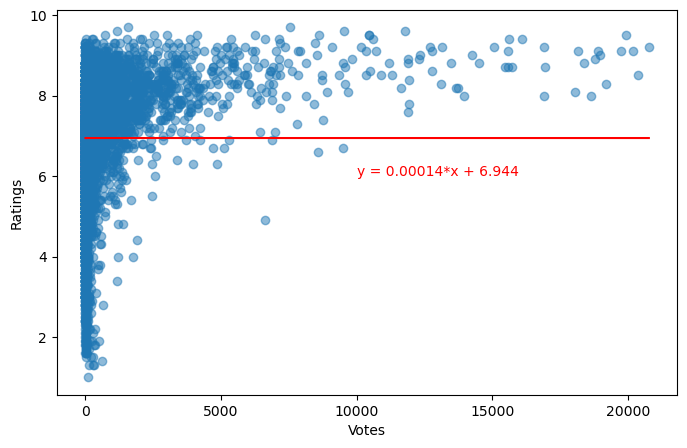

In [38]:
plt.figure(figsize=(8, 5))
plt.scatter(votes_range_df['votes'], votes_range_df['rating'], alpha=0.5)
plt.plot(votes_range_df['votes'], fit, color='r')
plt.xlabel('Votes')
plt.ylabel('Ratings')
plt.annotate(f"y = {round(slope, 5)}*x + {round(intercept, 3)}", (10000, 6), color='r')
plt.savefig('../Visuals/linear_plot_of_rating_and_votes.png')
plt.show()

C:\Users\s4013\AppData\Local\Temp\ipykernel_5336\3050610591.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


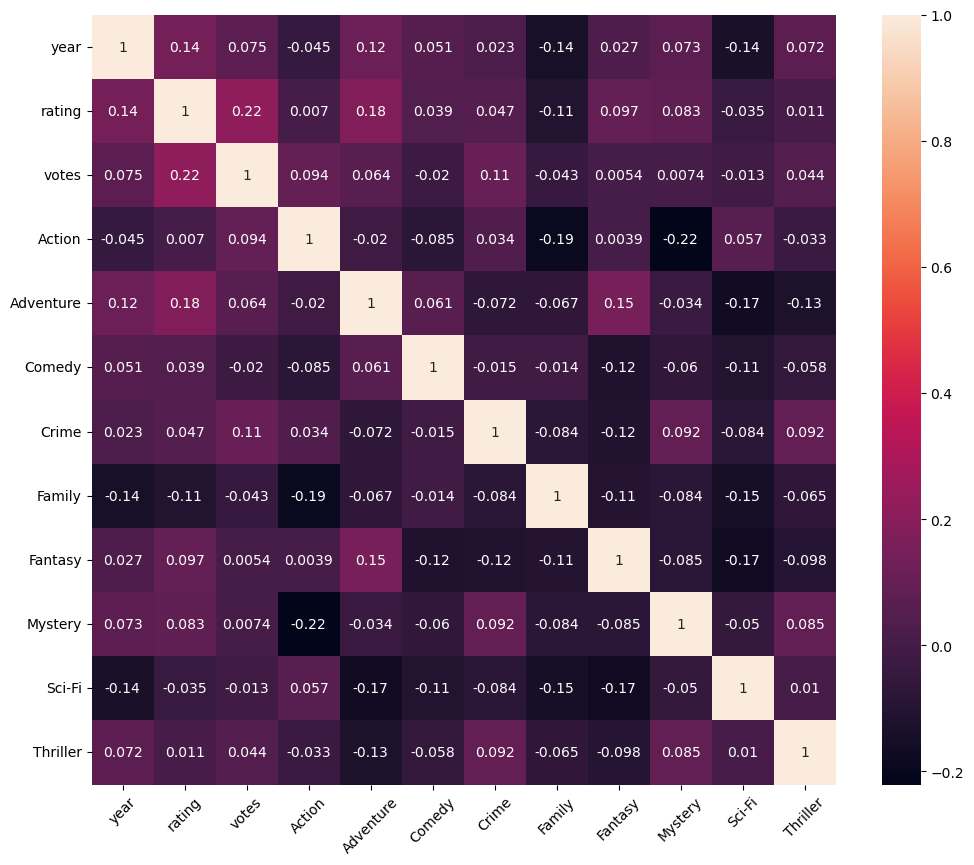

In [39]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45)
plt.savefig('../Visuals/corr_heatmap.png')
plt.show()

In [40]:
# calculate the upper and lower bounderys and remove outliers of vote data
iqr = df['votes'].describe()[6] - df['votes'].describe()[4]
upper_b = df['votes'].describe()[6] + 1.5*iqr
lower_b = df['votes'].describe()[4] - 1.5*iqr

df_rating_votes = df[['rating', 'votes']]
df_rating_votes = df_rating_votes.loc[(df_rating_votes['votes'] >= lower_b) & (df_rating_votes['votes'] <= upper_b)]
df_rating_votes

,rating,votes
17,7.8,244
21,9.0,84
41,8.2,350
42,4.3,221
56,6.1,288
...,...,...
10675,5.3,164
10676,7.9,17
10677,5.4,6
10678,6.0,30


In [41]:
df_rating_votes['votes'].describe()

count    8992.000000
mean       62.974310
std        76.264439
min         5.000000
25%        13.000000
50%        30.000000
75%        81.000000
max       376.000000
Name: votes, dtype: float64

In [42]:
df_rating_votes['vote group'] = pd.cut(df_rating_votes['votes'], bins=4, labels=['A', 'B', 'C', 'D'], ordered=True)
df_rating_votes

,rating,votes,vote group
17,7.8,244,C
21,9.0,84,A
41,8.2,350,D
42,4.3,221,C
56,6.1,288,D
...,...,...,...
10675,5.3,164,B
10676,7.9,17,A
10677,5.4,6,A
10678,6.0,30,A


<Figure size 800x500 with 0 Axes>

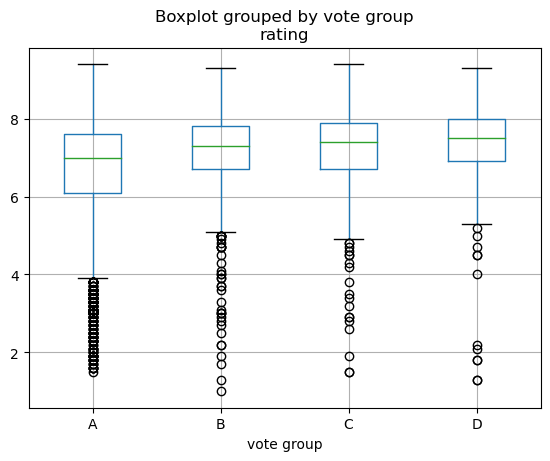

In [43]:
plt.figure(figsize=(8, 5))
df_rating_votes.boxplot('rating', by='vote group')
plt.savefig('../Visuals/boxplot_for_vote_group_rating.png')
plt.show()

In [44]:
groupA = df_rating_votes[df_rating_votes['vote group'] == 'A']['rating']
groupB = df_rating_votes[df_rating_votes['vote group'] == 'B']['rating']
groupC = df_rating_votes[df_rating_votes['vote group'] == 'C']['rating']
groupD = df_rating_votes[df_rating_votes['vote group'] == 'D']['rating']

In [45]:
stats.f_oneway(groupA, groupB, groupC, groupD)

F_onewayResult(statistic=55.572854685551384, pvalue=1.3827623142317754e-35)

## Conclusion

- The most popular video game genre? <br>
`Action` genre, refer to: [The Distribution of Genre](###The-Distribution-of-Genre)
There were a great amount of video games which been identified as `Action` genre also been recogized as `Adventure` genre. We can tell by looking at the Genre vs Year line plot. The two lines that represented `Action` and `Adventure` has similar pattern, refer to: [Genre v.s. Year](###Genre-v.s.-Year) 
<br><br>
- Which genre has the overall highest rating?<br>
`Mystery` genre has the overall highest rating.  `Adventure`, `Crime`, `Fantasy`, `Sci-Fi`, and `Thriller` have a few outliers of ratings, refer to: [Genre v.s. Rating](###Genre-v.s.-Rating)
<br><br>
- Which genre has the most votes? (Suppost that more votes means more users)<br>
`Action` genre got the most votes, which align to the answer of the first question, refer to: [Genre v.s. Votes](###Genre-v.s.-Votes)
<br><br>
- We can say `Action` is the most popular genre based on previous analysis. Which genre will be the best to combine with `Action` if we would like to have a high rating?<br>
The average rating for video games that only been identified as `Action` genre is 6.66. When we calculate the average rating of the combination of `Action` and the other genre, all the combinations got a higher rating than only `Action` genre itself, espicially `Action & Mystery`, which got 7.38 as the overall rating, refer to: [Action with other Genre Rating](###Action-with-other-Genre-Rating)
<br><br>
- According to the Heatmap above, we can tell that the variables in this dataset are independent to each other, with the highest correlation of 0.22 between `rating` and `votes`, and the lowest of -0.22 between `Action` and `Mystery`.
 
